# <font color = green>Lending Club Case Study</font>

### <font color = orange>Group members: Milon Priyaranjan and Chaitnya Gadela</font>

##### <font color = blue>Objective: Using EDA to create portfolio and risk assessment for identification of applicants who can lead to loan default</font>

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.options.display.float_format = '{:,.2f}'.format
warnings.filterwarnings('ignore')


In [2]:
# reading the Loan dataset file to pandas data frame 
# and using low memory flag for columns having multiple data types
loan_data = pd.read_csv("loan.csv", low_memory=False)

In [3]:
# checking the top 5 records from the dataset
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


In [4]:
# checking shape of data frame
loan_data.shape

(39717, 111)

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Data cleaing process

### <font color = blue> Deleting columns with missing or redundant values </font>

In [6]:
# checking percentage of missing values in each column
missing_cols_pc = round(loan_data.isnull().sum(axis = 0)/len(loan_data), 2)*100
missing_cols_pc

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
                              ...  
tax_liens                      0.00
tot_hi_cred_lim              100.00
total_bal_ex_mort            100.00
total_bc_limit               100.00
total_il_high_credit_limit   100.00
Length: 111, dtype: float64

In [7]:
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

###### Lot of columns have only null values, we have to remove these.
###### After analyzing the cloumns having null values it is safe to assume that columns having null value % more than 50% can be dropped

In [8]:
missing_columns = loan_data.columns[100*(loan_data.isnull().sum()/len(loan_data.index)) > 50]
print(missing_columns)

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [9]:
#dropping the columns having more than 50% missing values
loan_data_missing_dropped = loan_data.drop(missing_columns, axis=1)
print(loan_data_missing_dropped.shape)

(39717, 54)


###### There are many columns which have only one value, we will remove these columns as they do not influence the analysis.

In [10]:
# finding the unique columns, these columns will have a value of 1.
loan_data_missing_dropped.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [11]:
# removing the coulmns with same value throughout i.e, unique value of 1.
for column in loan_data_missing_dropped.columns:
    if len(loan_data_missing_dropped[column].unique()) == 1:
        loan_data_missing_dropped.drop(column,inplace=True,axis=1)
        

In [12]:
# checking number of unique values again
loan_data_missing_dropped.nunique().sort_values(ascending=True).head(12)

tax_liens                      1
chargeoff_within_12_mths       1
collections_12_mths_ex_med     1
term                           2
verification_status            3
pub_rec_bankruptcies           3
loan_status                    3
home_ownership                 5
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
dtype: int64

In [13]:
# Deleting those columns which are not of importance for analysis of loan defaulters.
loan_data_to_standardize = loan_data_missing_dropped.drop(['member_id', 'id','url','desc','pub_rec','tax_liens','emp_title',
                                                           'pub_rec_bankruptcies','collections_12_mths_ex_med','total_acc',
                                                            'out_prncp','zip_code','chargeoff_within_12_mths','open_acc'
                                                            ], axis=1)

In [14]:
loan_data_to_standardize.nunique()

loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
purpose                       14
title                      19615
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
revol_bal                  21711
revol_util                  1089
out_prncp_inv               1138
total_pymnt                37850
total_pymnt_inv            37518
total_rec_prncp             7976
total_rec_int              35148
total_rec_late_fee          1356
recoveries                  4040
collection

In [15]:
loan_data_to_standardize.shape

(39717, 34)

In [16]:
loan_data_to_standardize.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
title                       object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
revol_bal                    int64
revol_util                  object
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp            float64
total_rec_int              float64
total_rec_late_fee  

In [17]:
# removing '%' from int_rate and revol_util
loan_data_to_standardize['int_rate_percentage'] = loan_data_to_standardize.int_rate.str.strip('%').astype(float)
loan_data_to_standardize['revol_util_percentage'] = loan_data_to_standardize.revol_util.str.strip('%').astype(float)
loan_data_to_standardize = loan_data_to_standardize.drop(['int_rate','revol_util'], axis=1)

In [18]:
loan_data_to_standardize['issue_d_month'], loan_data_to_standardize['issue_d_year'] = loan_data_to_standardize[
                                                                                      'issue_d'].str.split('-').str

loan_data_to_standardize['last_credit_pull_d_month'], loan_data_to_standardize['last_credit_pull_d_year'] = loan_data_to_standardize[
                                                                                      'last_credit_pull_d'].str.split('-').str

loan_data_to_standardize['last_pymnt_d_month'], loan_data_to_standardize['last_pymnt_d_year'] = loan_data_to_standardize[
                                                                                      'last_pymnt_d'].str.split('-').str

loan_data_to_standardize['earliest_cr_line_month'], loan_data_to_standardize['earliest_cr_line_year'] = loan_data_to_standardize[
                                                                                      'earliest_cr_line'].str.split('-').str

loan_data_to_standardize['issue_d_year'] = '20' + loan_data_to_standardize['issue_d_year']

In [19]:
loan_data_to_standardize.dtypes

loan_amnt                     int64
funded_amnt                   int64
funded_amnt_inv             float64
term                         object
installment                 float64
grade                        object
sub_grade                    object
emp_length                   object
home_ownership               object
annual_inc                  float64
verification_status          object
issue_d                      object
loan_status                  object
purpose                      object
title                        object
addr_state                   object
dti                         float64
delinq_2yrs                   int64
earliest_cr_line             object
inq_last_6mths                int64
revol_bal                     int64
out_prncp_inv               float64
total_pymnt                 float64
total_pymnt_inv             float64
total_rec_prncp             float64
total_rec_int               float64
total_rec_late_fee          float64
recoveries                  

### Standardizing the column datatypes

In [20]:
columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'dti','total_rec_int', 
          'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
          'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'int_rate_percentage','revol_util_percentage']

In [21]:
# Removing loan status "Current" 
loan_data_to_standardize = loan_data_to_standardize[loan_data_to_standardize.loan_status !='Current']

In [22]:
df = loan_data_to_standardize

## Univariate Analysis

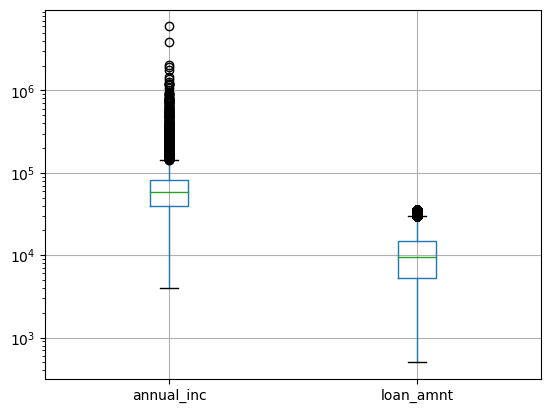

In [23]:
# checking for outliers
plt.yscale('log')
df.boxplot(column=['annual_inc','loan_amnt']);

In [24]:
df["annual_inc"].describe()

count      38,577.00
mean       68,777.97
std        64,218.68
min         4,000.00
25%        40,000.00
50%        58,868.00
75%        82,000.00
max     6,000,000.00
Name: annual_inc, dtype: float64

Max value is 294000 which is approx 4 times more than mean value.

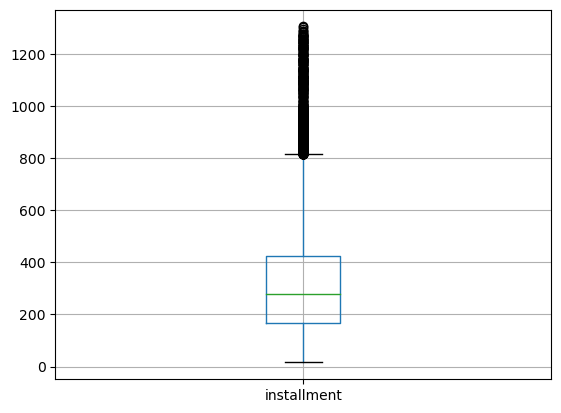

In [25]:
df.boxplot(column=['installment']);

In [26]:
df["installment"].describe()

count   38,577.00
mean       322.47
std        208.64
min         15.69
25%        165.74
50%        277.86
75%        425.55
max      1,305.19
Name: installment, dtype: float64

#### Distribution of loan amount

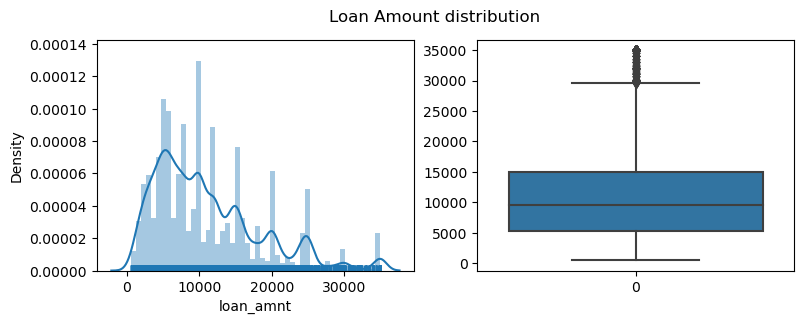

In [27]:
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)

#Histogram plot
sns.distplot(a=df.loan_amnt, rug=True)
plt.subplot(1,2,2)

#Box plot
sns.boxplot(data=df.loan_amnt)

plt.suptitle('Loan Amount distribution')
plt.show()

Observations:
From the above plots, more number of people took loan amount of 10000, and also meadian of distribution is 10000. And very few people took more than 30000 loan amount.

#### funded_amnt_inv

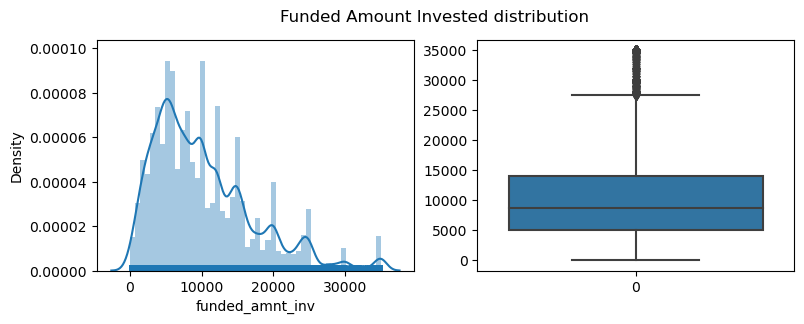

In [28]:
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
sns.distplot(a=df.funded_amnt_inv, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=df.funded_amnt_inv)
plt.suptitle('Funded Amount Invested distribution')
plt.show()

Observations:
Funded amount investment data behaves similar to loan Amount, Which tells us that Lending club approved atmost of Applied loan amount.

#### Interest Rate

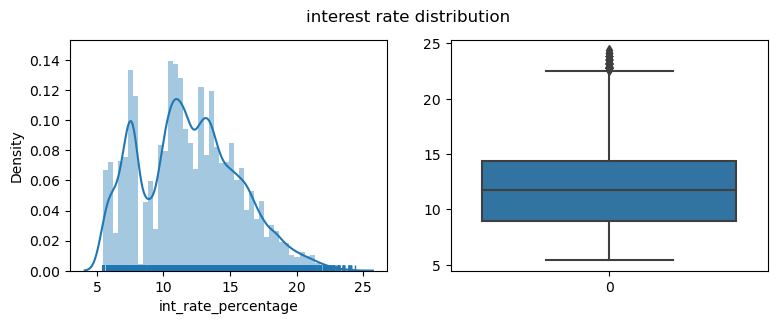

In [29]:
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
sns.distplot(a=df.int_rate_percentage, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=df.int_rate_percentage)
plt.suptitle('interest rate distribution')
plt.show()

Observations:
From the above 2 plots and statistics of interest rates we can conclude that most of the interest rates lies between 9% to 14.5%. Some people took loan at higher rates of interest i.e., 22.5%

#### Employment length

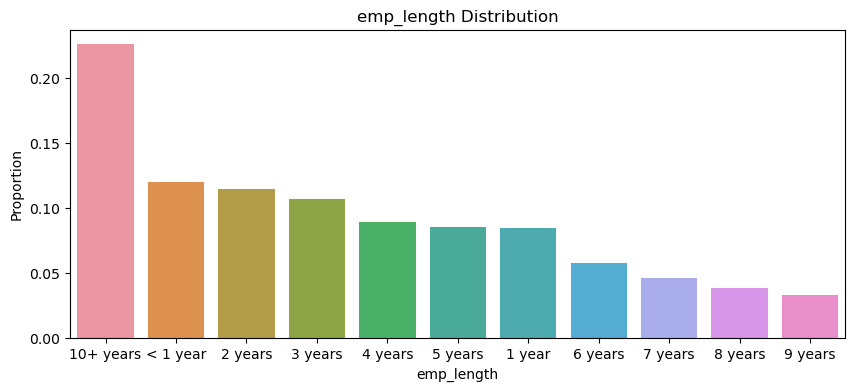

In [30]:
plt.figure(figsize=(10,4))
var = 'emp_length'
#Probability / Percentage of each values
prob_df = df[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()


Observations:
Borrowers are mostly 10+ years emploment length.

#### Home Ownership

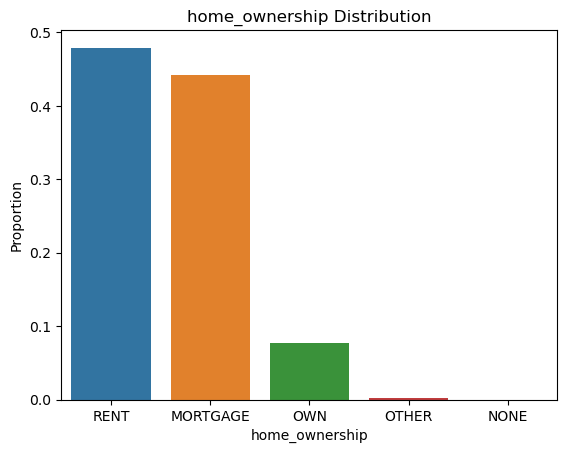

In [31]:

var = 'home_ownership'
#Probability / Percentage of each values
prob_df = df[var].value_counts(normalize=True).reset_index()
#Plotting percentage proporation vs home ownership
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()


Observations:
The loan borrowers are mostly having rented and mortgage houses.

#### Verification Status

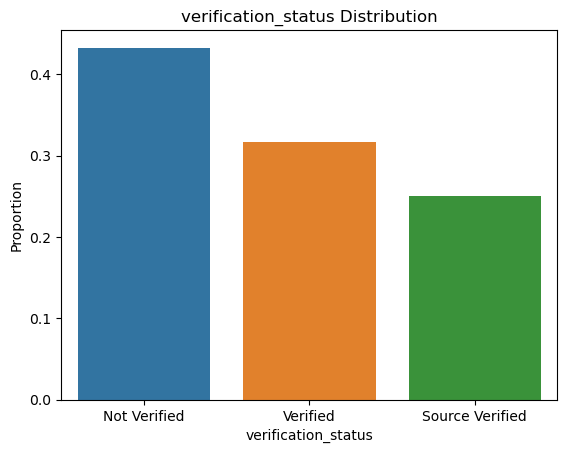

In [32]:
var = 'verification_status'
#Probability / Percentage of each values
prob_df = df[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

Observations:
Majority of loans were given without verification of applicants income.

#### Loan Status

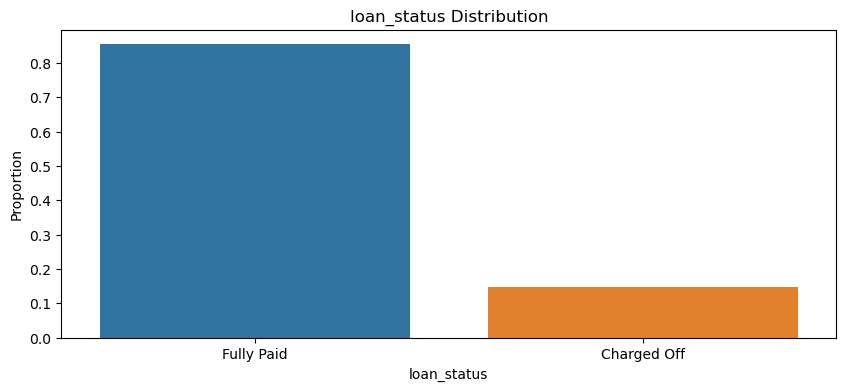

In [33]:
plt.figure(figsize=(10,4))
var = 'loan_status'
#Probability / Percentage of each values
prob_df = df[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()


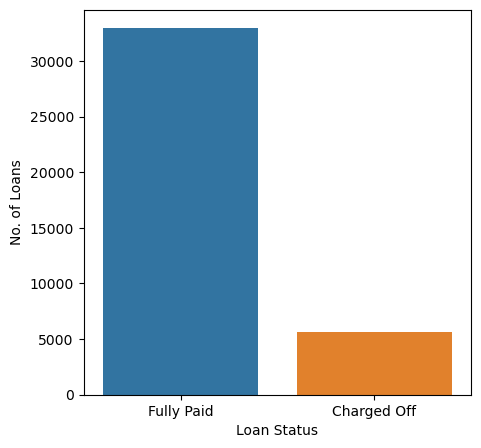

In [34]:
#count plot for loan status
plt.figure(figsize=(5,5))
ax = sns.countplot(x="loan_status", data=df)
ax.set(xlabel='Loan Status', ylabel='No. of Loans')
plt.show()

The above plot gives the overall idea of the loan classification count, it shows that more than 30000 loans are fully paid while close to 5000 loans are charged off.
85% of borrowers has paid the loan fully. where are 14% are defaulted the loan.

###### Comparison of charged off loans with Loan Status

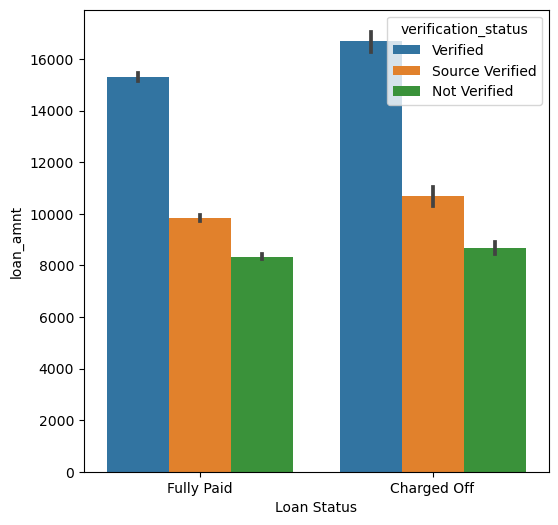

In [35]:
plt.figure(figsize=(6,6))
sns.barplot(x='loan_status',y='loan_amnt', hue='verification_status', data=df)
plt.xlabel("Loan Status")
plt.show()

Above graph shows that Max no. of loans are charged off where verification status is Verified.

#### Purpose

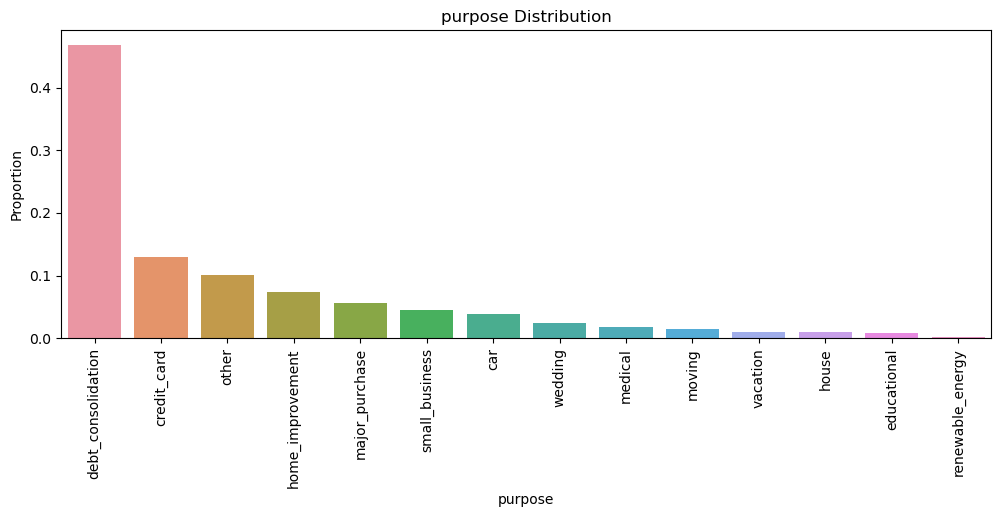

In [36]:
plt.figure(figsize=(12,4))
var = 'purpose'
#Probability / Percentage of each values
prob_df = df[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

Most number of people took loan for debt consolidation and a very few people took for renewable energy

#### Borrower's State (add_state)

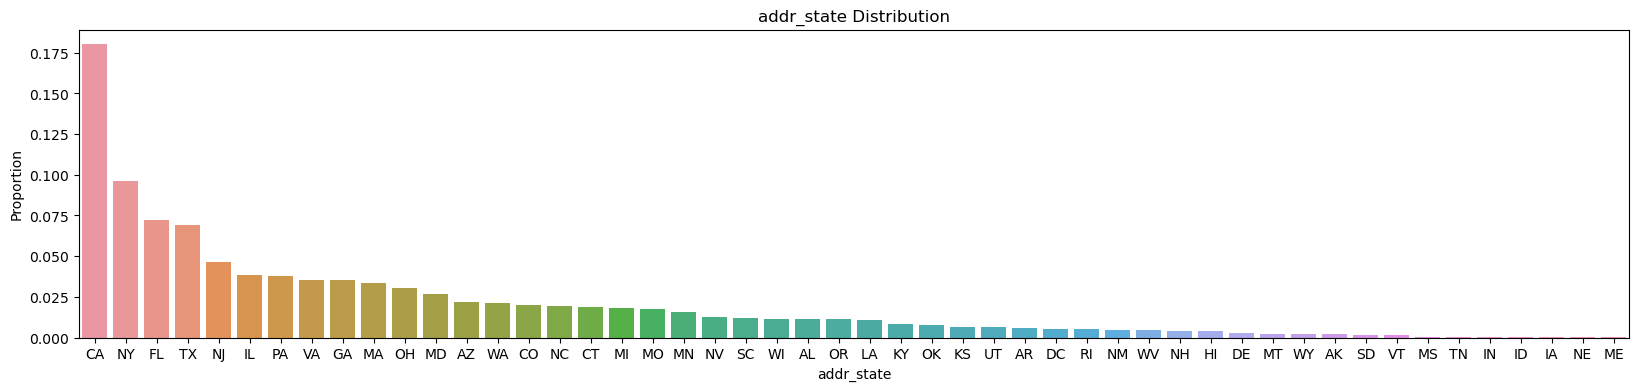

In [37]:
plt.figure(figsize=(20,4))
var = 'addr_state'
#Probability / Percentage of each values
prob_df = df[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

Observations:
Most of the borrowers are from CA and NY

### Year Wise and Month Wise Distribution of charged-off and fully paid loans

In [38]:
#making a new dataframe for loans where status is charged off
charged_off_loans=df.loc[df['loan_status']=='Charged Off']
charged_off_loans['issue_d_year']=charged_off_loans['issue_d_year'].astype(int)

#making a new dataframe for loans where status is Fully Paid
fully_paid_loans = df[df['loan_status'] == "Fully Paid"]
fully_paid_loans['issue_d_year']=fully_paid_loans['issue_d_year'].astype(int)

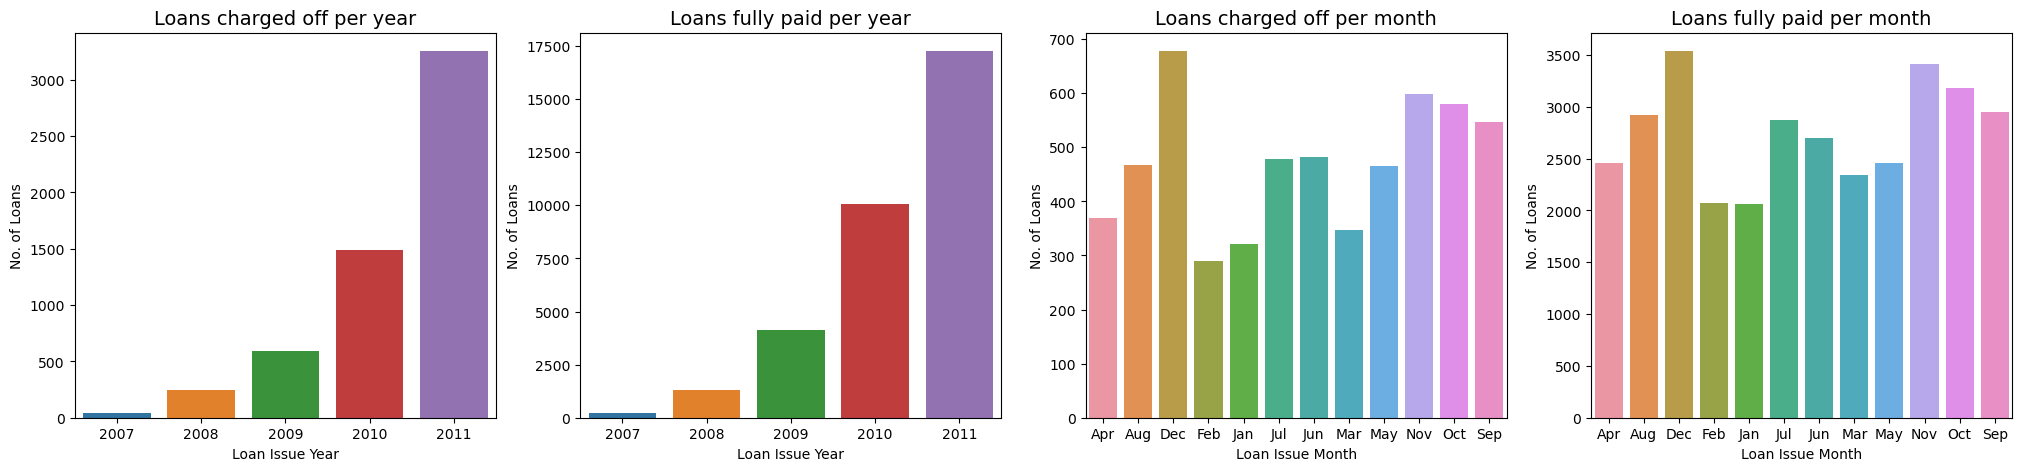

In [39]:
#year wise distribution of loans that are charged off
plt.figure(figsize=(25,5))
plt.subplot(1, 4, 1)
ax1=sns.countplot(charged_off_loans['issue_d_year'], order=sorted(charged_off_loans.issue_d_year.unique()))
ax1.set_title('Loans charged off per year', fontsize=14)
ax1.set(xlabel='Loan Issue Year', ylabel='No. of Loans')

#month wise distribution of loans that are fully paid
plt.subplot(1, 4, 2)
ax2=sns.countplot(fully_paid_loans['issue_d_year'], order=sorted(fully_paid_loans.issue_d_year.unique()))
ax2.set_title('Loans fully paid per year', fontsize=14)
ax2.set(xlabel='Loan Issue Year', ylabel='No. of Loans')

#month wise distribution of loans that are charged off
plt.subplot(1, 4, 3)
ax3=sns.countplot(charged_off_loans['issue_d_month'], order=sorted(charged_off_loans.issue_d_month.unique()))
ax3.set_title('Loans charged off per month', fontsize=14)
ax3.set(xlabel='Loan Issue Month', ylabel='No. of Loans')

#month wise distribution of loans that are fully paid
plt.subplot(1, 4, 4)
ax4=sns.countplot(fully_paid_loans['issue_d_month'], order=sorted(fully_paid_loans.issue_d_month.unique()))
ax4.set_title('Loans fully paid per month', fontsize=14)
ax4.set(xlabel='Loan Issue Month', ylabel='No. of Loans')

plt.show()

Observations:
- No Of loans given out by lending club is increasing at almmost twice the rate  every year, with 2011 havin the highest number of loans.
- The month-wise trend shows that most loans are fully paid as well as charged off as the year comes to an end, maximum in the month of December clearly stating the importance of year-end.
- There are more issues of loan in last 3 months every end of the ear i.e., Oct, Nov and Dec.
- Lending Club has issued more loans on tuesday and wednessday than other week days.

## Segmented Univariate Analysis

#### Loan Amount

<AxesSubplot:title={'center':'Grade vs Loan Amount'}, xlabel='grade', ylabel='loan_amnt'>

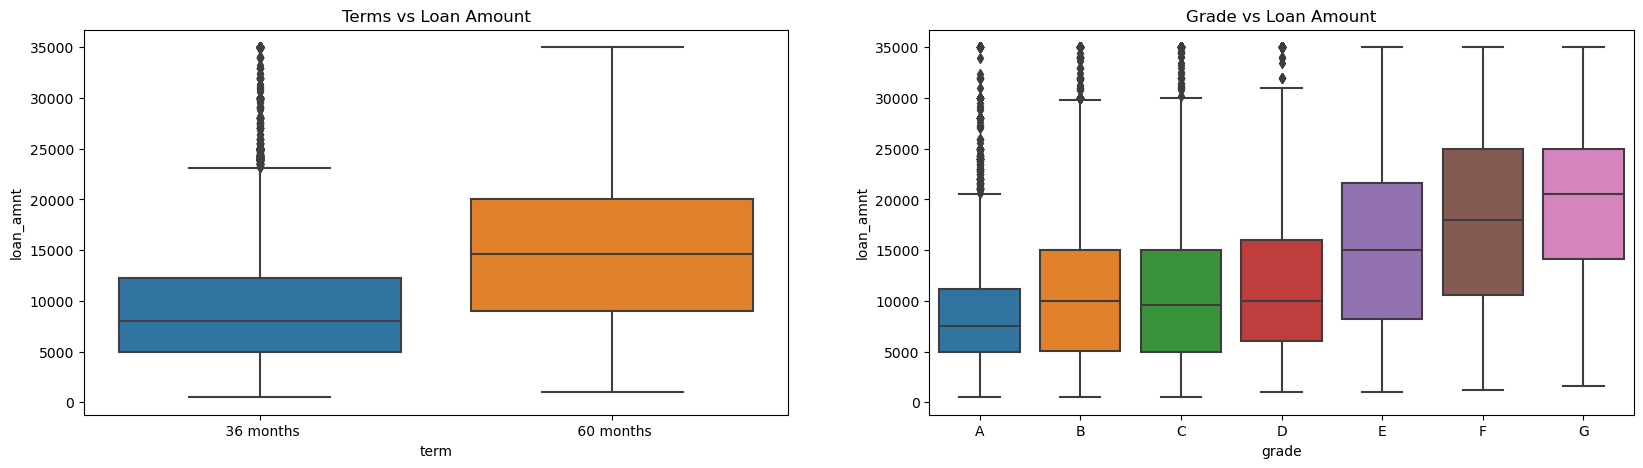

In [40]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=df.loan_amnt, data=df)
plt.title('Terms vs Loan Amount')
plt.subplot(122)
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = df.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=df.loan_amnt, order = grade_ord, data=df)


Observations:
Higher amount loans have high tenure i.e, 60 months.
Grade 'G' and 'H' have taken max loan amount. As Grades are decreasing the loan amount is increasing.

#### funded_amnt

<AxesSubplot:title={'center':'Grade vs funded amount'}, xlabel='grade', ylabel='funded_amnt'>

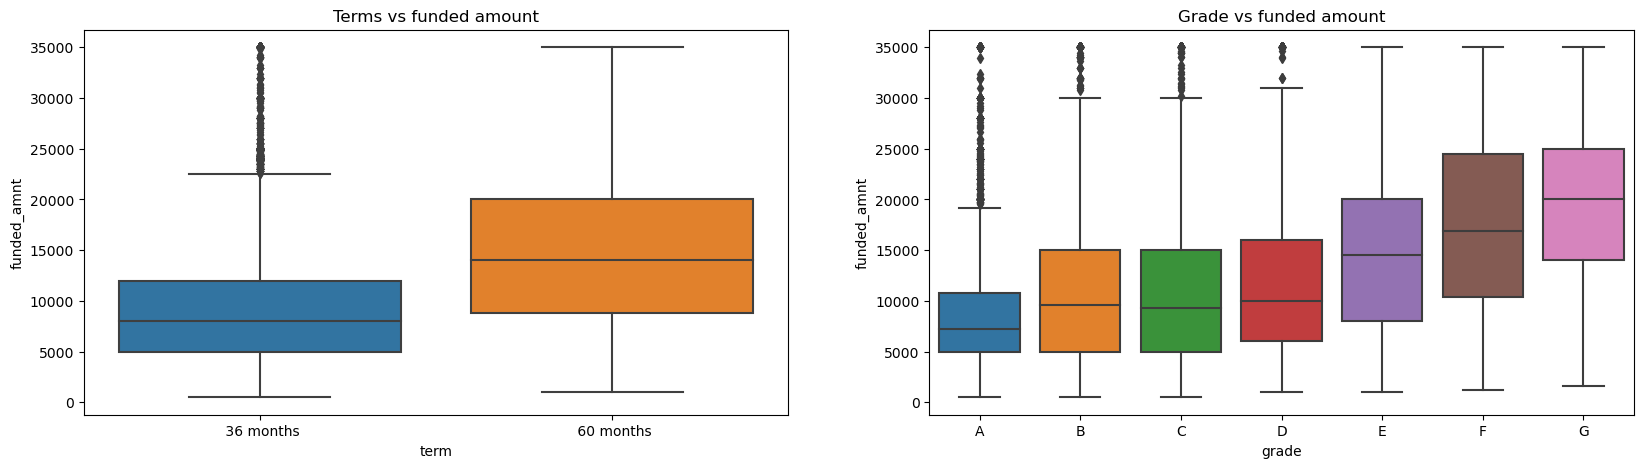

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=df.funded_amnt, data=df)
plt.title('Terms vs funded amount')
plt.subplot(122)
plt.title('Grade vs funded amount')
grade_ord = df.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=df.funded_amnt, order = grade_ord, data=df)

#### loan_status vs Interest Rate

Text(0.5, 1.0, 'loan_status vs Interest Rate')

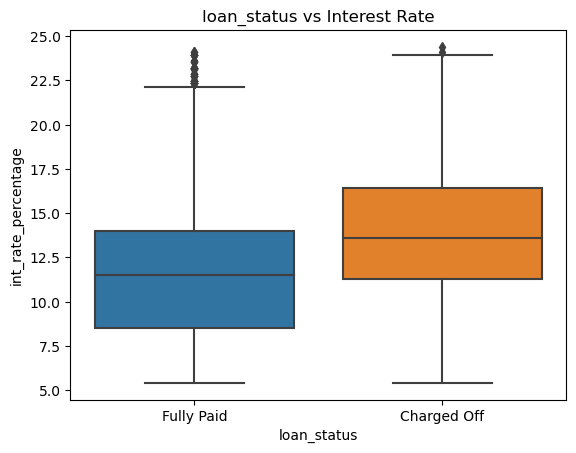

In [42]:
sns.boxplot(x='loan_status', y=df.int_rate_percentage, data=df)
plt.title('loan_status vs Interest Rate')

Observations:
This clearly tells us, grater the interest rate more the chance of Defaulting the loan.

#### annual_inc

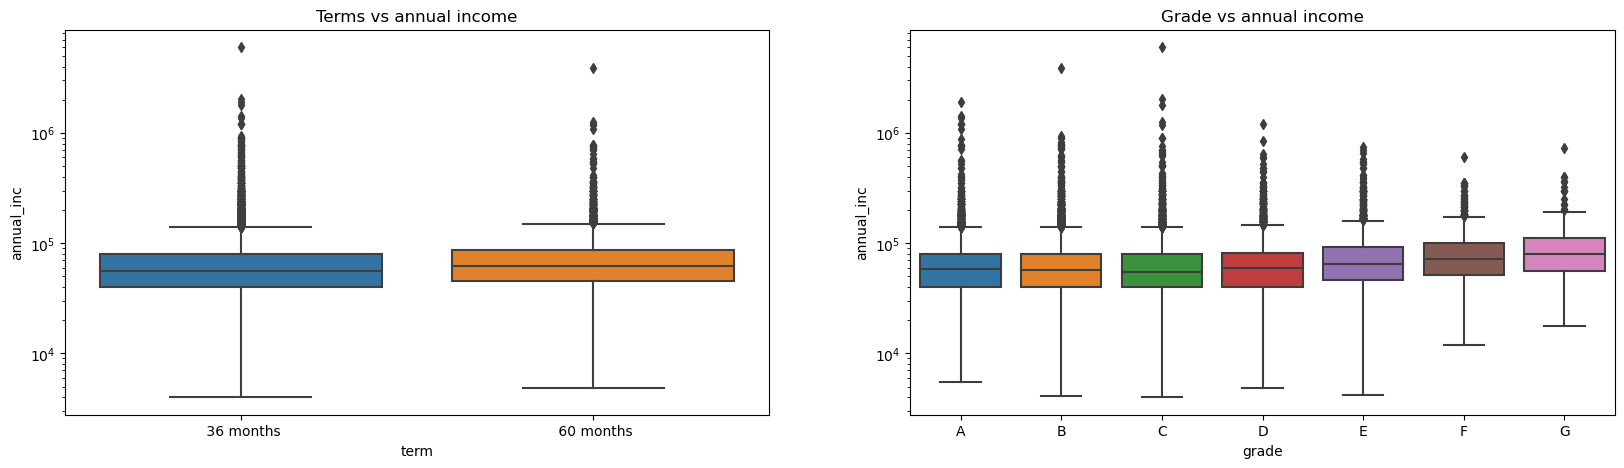

In [43]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=df.annual_inc, data=df)
plt.title('Terms vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('Grade vs annual income')
grade_ord = df.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=df.annual_inc, order = grade_ord, data=df)
plt.yscale('log')


Observations:
Comparatively Annual income is higher for lower grades.

In [44]:
def crosstab(df,col):
    '''
    df : Dataframe
    col: Column Name
    '''
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Percentage_Charged Off'] = round(((100*crosstab['Charged Off'])/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab


In [45]:
# Probability of charge off
def bivariate_prob(df,col,stacked= True):
    '''
    df      : Dataframe
    col     : Column Name
    stacked : True(default) for Stacked Bar
    '''
    # get dataframe from crosstab function
    plotCrosstab = crosstab(df,col)
    
    linePlot = plotCrosstab[['Percentage_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Percentage Charge Off',fontsize=20,weight="bold")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Percentage of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    ax2.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    plt.show()

#### Purpose of loan w.r.t % of loans charged off and no. of loan applicants

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
purpose,,,,
car,160,1339,1499,10.67
credit_card,542,4485,5027,10.78
debt_consolidation,2767,15288,18055,15.32
educational,56,269,325,17.23
home_improvement,347,2528,2875,12.07
house,59,308,367,16.08
major_purchase,222,1928,2150,10.33
medical,106,575,681,15.56
moving,92,484,576,15.97


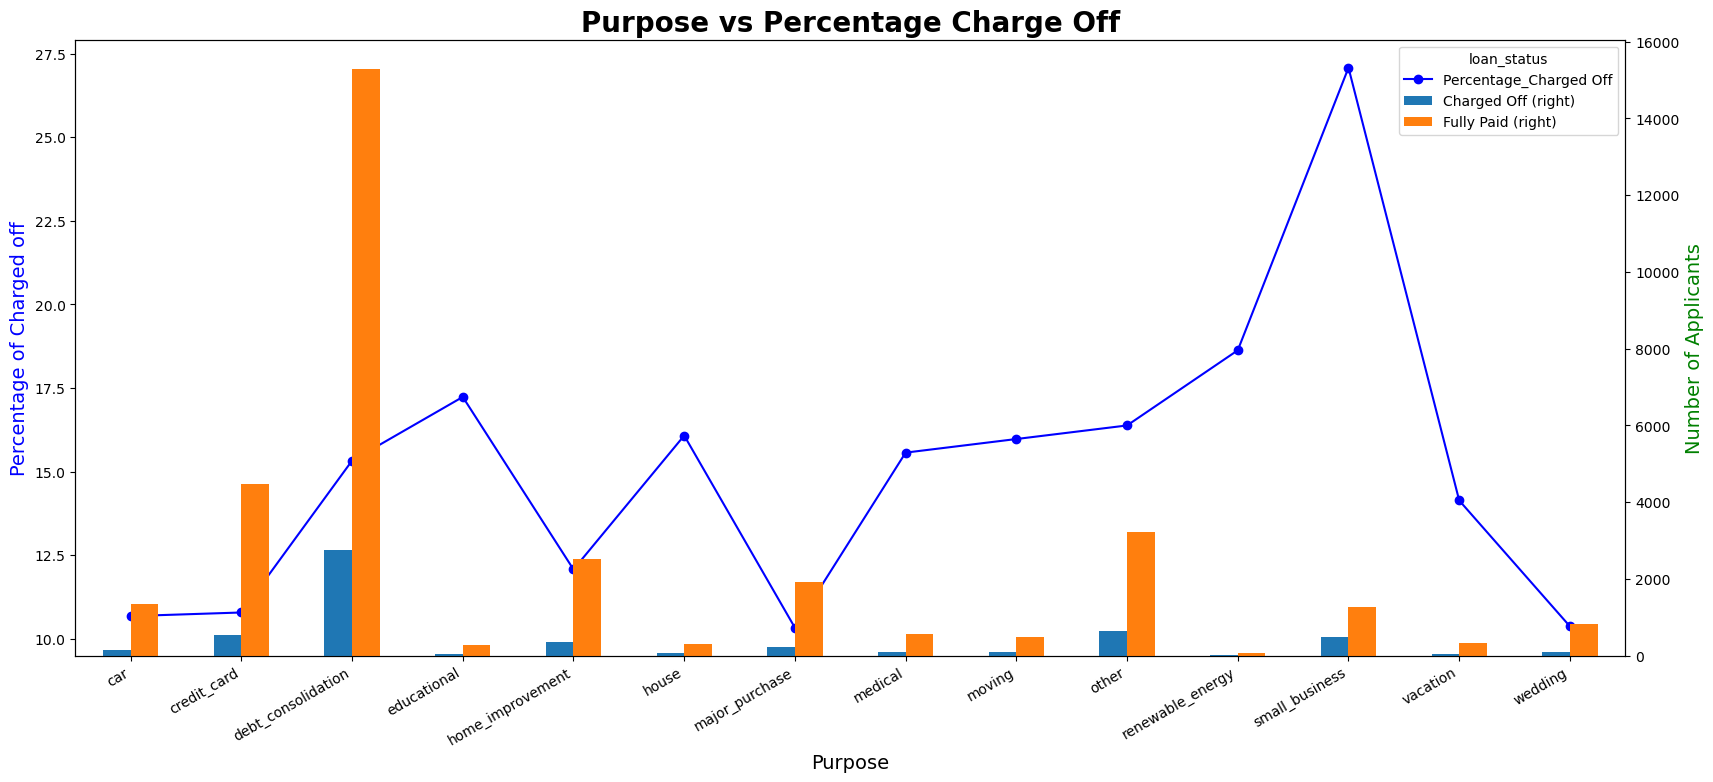

In [46]:
purpose = crosstab(df,'purpose')
display(purpose)

bivariate_prob(df =df,col ='purpose',stacked=False) 

Right hand side marker is for number of loan applicants and left hand side marker shows the percentage charged off

Insights from the above graph

1. Maximum no. of loans i.e. 17487 are accepted for the purpose of Debt Consolidation out of which 14827 are fully paid and 2660 are charged off i.e. 15.2%
2. Maximum % of a loan being charged off is for the purpose of small business and the % is 27.1.

#### Loan amount w.r.t % of loans charged off and no. of loan applicants

In [47]:
#Making bins for Loan Amount
bins = [0, 5000, 10000, 15000, 20000, 25000,30000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000-30000' , '30000 and above']
df['loan_amnt_range'] = pd.cut(df['loan_amnt'], bins, labels=slot)

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
loan_amnt_range,,,,
0-5000,1314,8158,9472,13.87
5000-10000,1642,11160,12802,12.83
10000-15000,1055,6628,7683,13.73
15000-20000,751,3598,4349,17.27
20000-25000,542,2294,2836,19.11
25000-30000,143,557,700,20.43
30000 and above,180,555,735,24.49


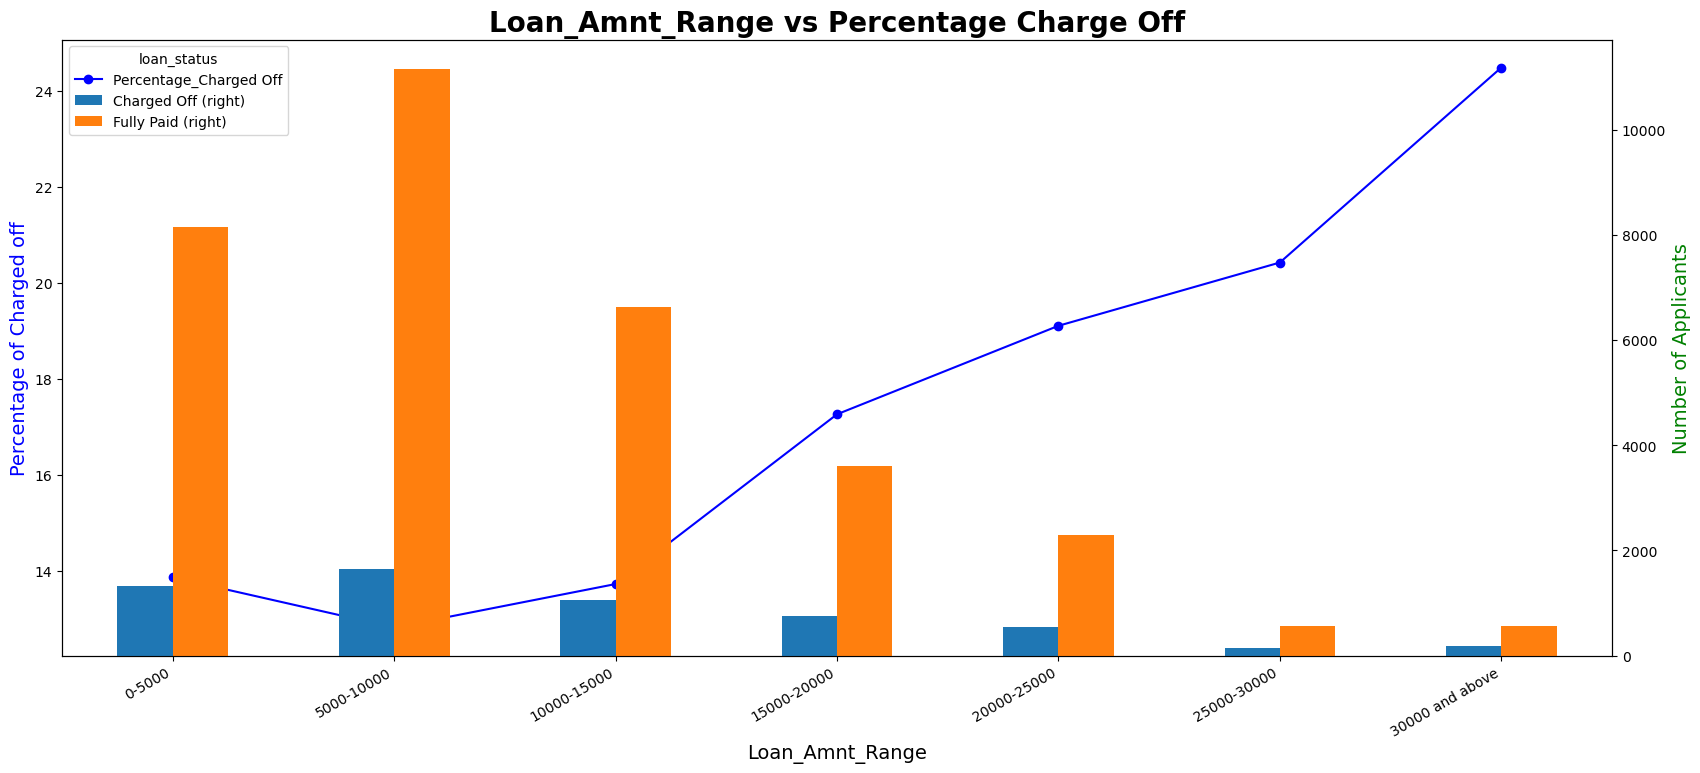

In [48]:
#Plotting the loan amount w.r.t % of loans charged off and no. of loan applicants. 
loan_amnt_range = crosstab(df,'loan_amnt_range')
display(loan_amnt_range)

bivariate_prob(df =df,col ='loan_amnt_range',stacked=False) 

Observations:

1. Higher the loan amount higher is the chances of loan being charged off increases. It is maximum, 24.49% for the amount of $ 30,000 and above
2. The maximum no. of loans, 12410 are applied where the loan amount ranges between 5000 and 10000.

#### Annual Income Range w.r.t % of loans charged off and no. of loan applicants

In [49]:
#Making bins for annual_inc_range
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
df['annual_inc_range'] = pd.cut(df['annual_inc'], bins, labels=slot)

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
annual_inc_range,,,,
0-25000,488,2062,2550,19.14
25000-50000,2125,10714,12839,16.55
50000-75000,1686,9982,11668,14.45
75000-100000,736,5303,6039,12.19
100000 and above,591,4876,5467,10.81


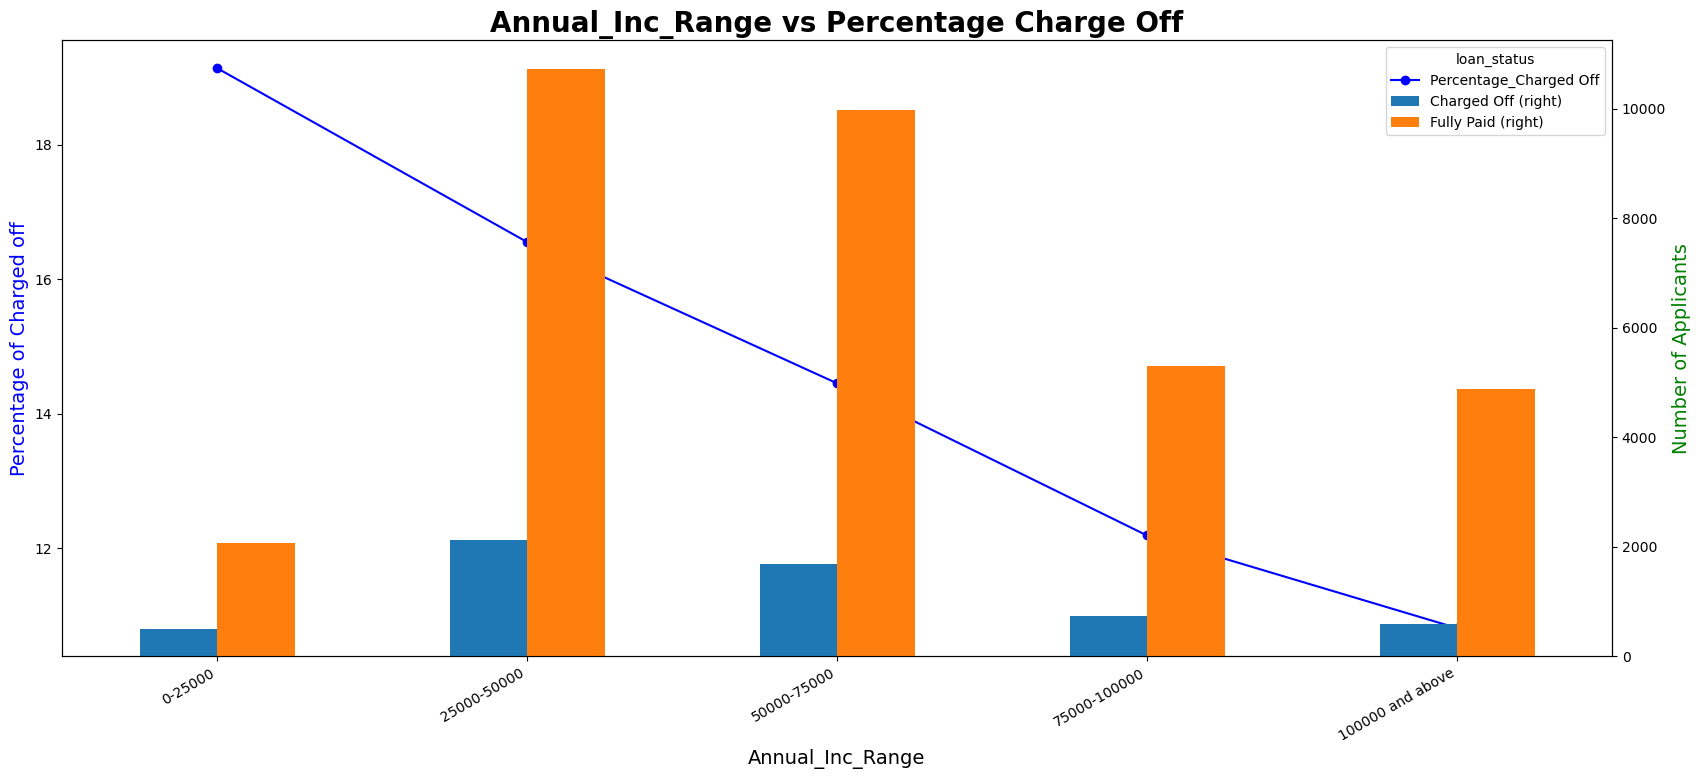

In [50]:

#Plotting the annual_inc_range w.r.t % of loans charged off and no. of loan applicants. 
annual_inc_range = crosstab(df,'annual_inc_range')
display(annual_inc_range)

bivariate_prob(df =df,col ='annual_inc_range',stacked=False) 

Observation:
 1. The % of loan getting charged off is inversely propertional to the Annual income. higher the income lower are the chances of loan getting charged off.
 2. It is lowest for max income i.e, 100,000 and above and highest for min income i.e, 25,000 and less.
 3. The income group which has applied for maximum loan are applicants with annual income between 25,000 to 50,000.

#### Interest Rate w.r.t % of loans charged off and no. of loan applicants

In [51]:
#Making bins for interest range
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
df['int_rate_range'] = pd.cut(df['int_rate_percentage'], bins, labels=slot)

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
int_rate_range,,,,
0-7.5,256,5114,5370,4.77
7.5-10,574,6372,6946,8.26
10-12.5,1232,8148,9380,13.13
12.5-15,1475,7410,8885,16.60
15 and above,1794,5432,7226,24.83


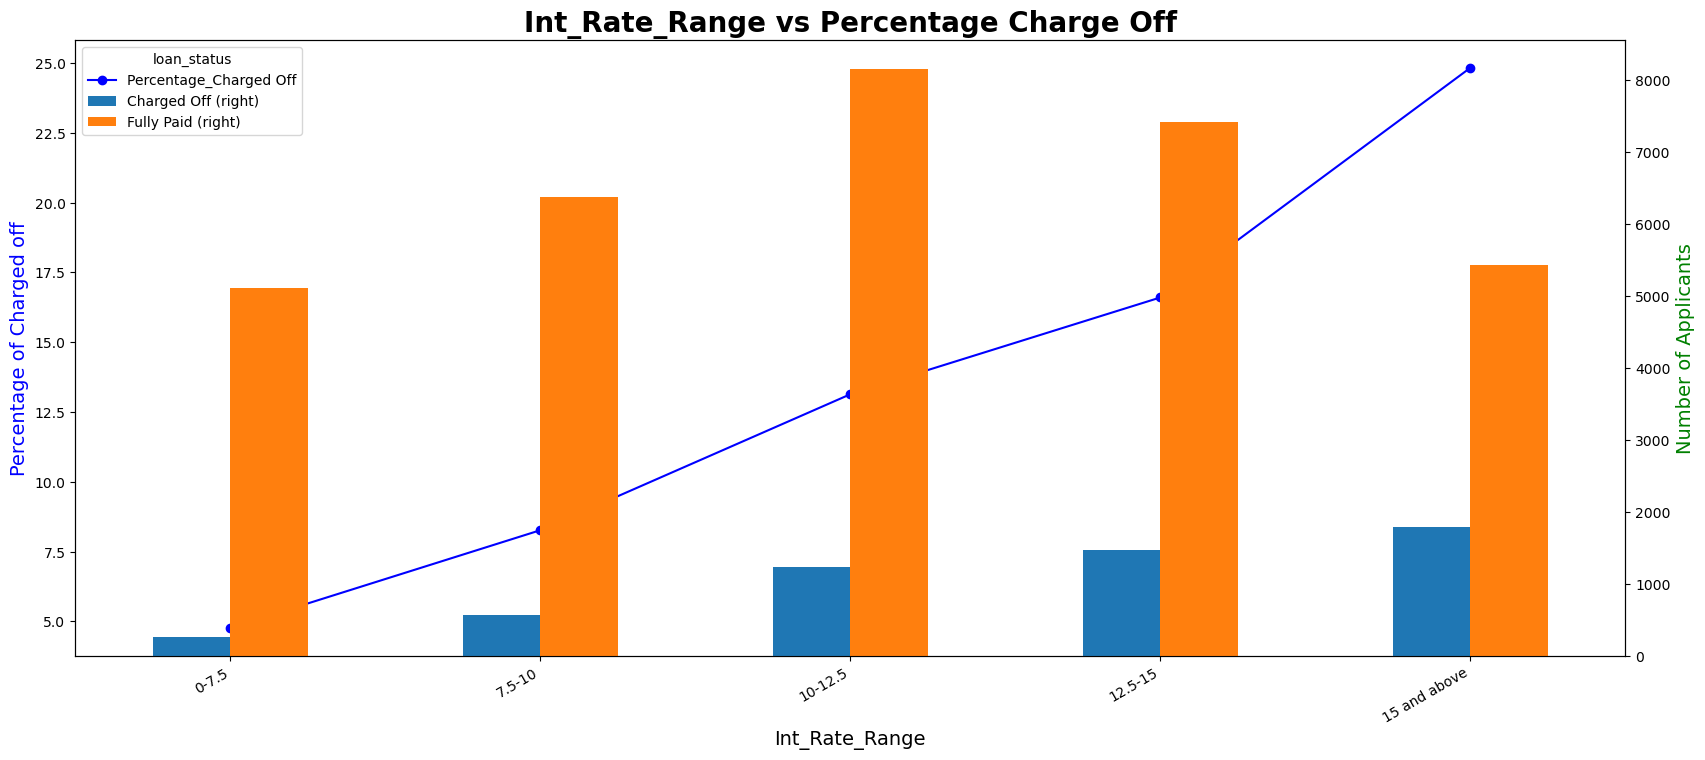

In [52]:
#Plotting the int_rate_range w.r.t % of loans charged off and no. of loan applicants. 
int_rate_range = crosstab(df,'int_rate_range')
display(int_rate_range)

bivariate_prob(df =df,col ='int_rate_range',stacked=False) 

Observation:
 1. The % of loan getting charged off is directly propertional to the Interest rate. Higher the Interest rate higher are the chances of loan getting charged off.
 2. It is lowest for min Interest rate of 7.5% and below and highest for max Interest rate i.e, 15% and above.
 3. The maximum loan are with 10-12.5% Interest rate.

#### Term w.r.t % of loans charged off and no. of loan applicants

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
term,,,,
36 months,3227,25869,29096,11.09
60 months,2400,7081,9481,25.31


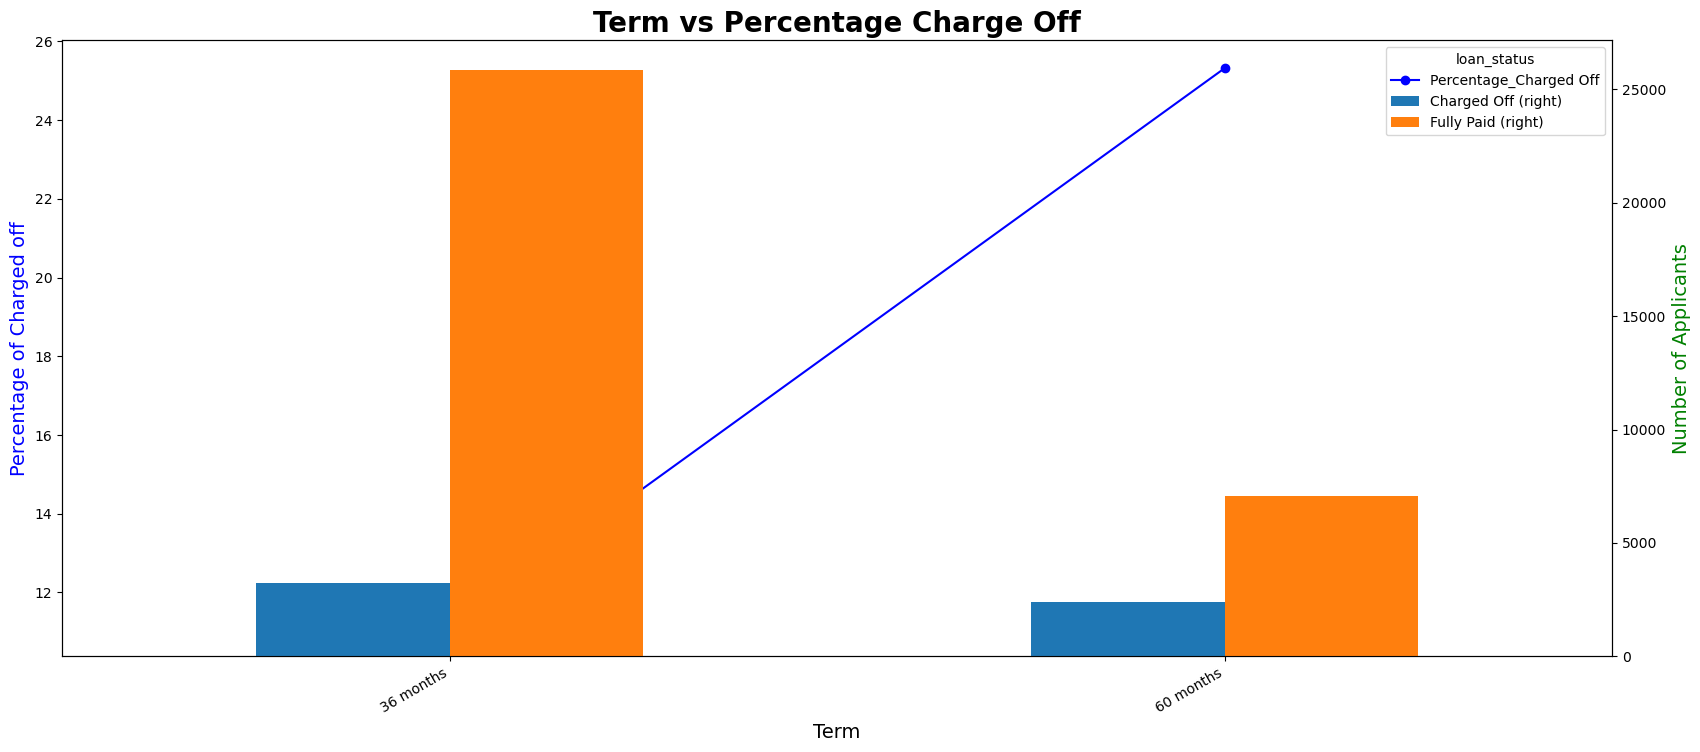

In [53]:
#Plotting the term w.r.t % of loans charged off and no. of loan applicants. 
term = crosstab(df,'term')
display(term)

bivariate_prob(df =df,col ='term',stacked=False)

Observations:
1. % of loans getting charged-off for 60 month term i.i. 25.31% is higher as compared to 36 month term i.e. 11.9%
2. Total no. of loan applications are very high for 36 month term as compared to 60 month term.

# Final Observations

- Quarter 4 of the year gets the most loans being either fully paid or being charged off. Lending club must be vigilant during this qurter of the year.

- Loans should be accepted from whose annual income is greater than 100000. While the number of applicanets with high anual income is less, the LC could avoid loan requests from low income group as they have high probability of being charged off.

- Applications with higher loan amounts have hogh chances of being charged off, while most of the loan amounts fall in 5000-1000 range and it has the lowest percentage of charge off. Lending club should consider if loan amount is high or low for accepting a loan request.

- Taking into account the loan amount, Grade E,F and G have applicants with higher loan amount which leads to higher chances of laon being charged off. So accepting loan for Grade E,F and G applicants is not recommended.

- Just like the loan amount, high interest rates are also linked with higher chances of loans being charged off. The safest being 0 - 7.5% rates. The LC should consider and probably avoid loan applications with high loan amount and high interest rates.

- Similarly the loan term is also a contributing factor along with above two (Amount and Rate), higher terms have led to higher charged off percentage. Loan with term of 36 months should be accepted.

- The purpose of loan can also be a deciding factor, most loans are taken for 'Debt Consolidation' but the highest loans charged off are for Small Businesses, so accepting loans for the purpose of small business is not recommended while acceting loan for Car, Credit Cards, home improvement, major purchase and weddings is highely recommended.